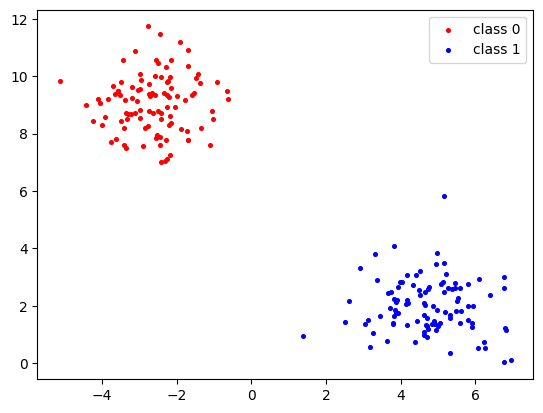

In [18]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=200, centers=2, random_state=42)
X[:5], y[:5]

plt.scatter(X[:,0][y==0],X[:,1][y==0],c='r',s=7,label='class 0')
plt.scatter(X[:,0][y==1],X[:,1][y==1],c='b',s=7,label='class 1')
plt.legend()

In [ ]:
def visualize_output(X,y,W,b):
    a = W

    plt.scatter(X[:,0][y==0],X[:,1][y==0],c='r',s=7,label='class 0')
    plt.scatter(X[:,0][y==1],X[:,1][y==1],c='b',s=7,label='class 1')

    xmin,xmax = X[:,0].min(),X[:,1].min()
    y_1,y_2 = a*xmin+b,a*xmax+b
    plt.axline((xmin,y_1),(xmax,y_2),c='g')


In [ ]:
class Perceptron:
    def __init__(self,eta=0.1,n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        self.W = None
        self.b = None

    def weighted_sum(self,X):
        # print(X,self.W)
        return np.dot(X,self.W) + self.b
    
    def activation(self,X):
        return np.where(self.weighted_sum(X)>=0,1,0)
    
    def fit(self,X,y):
        self.W = np.zeros(X.shape[1]) 
        self.b = 0
        for epoch in range(self.n_iter):
            m = X.shape[0]
            n = X.shape[1]
            for i in range(m):
                y_pred = self.activation(X[i])
                err = np.abs(y_pred-y[i])
                for j in range(n):
                    self.W[j] += self.eta*err*X[i,j]
                self.b += self.eta*err

    def predict(self,X,y):
        y_pred = [self.activation(x) for x in X ]
        return y_pred

pcp = Perceptron()
pcp.fit(X,y)


y_pred = pcp.predict(X,y)
print(np.dot(X[0],pcp.W)+pcp.b,y[0])
total = np.count_nonzero(y_pred)/X.shape[0]
print(total)


3791.529596000467 1
0.945


In [22]:
perceptron(X,y,epochs=100,eta0=0.1)

TypeError: 'module' object is not callable